# Network X - Fundamentals

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

This notebook serves as a brief introduction to the NetworkX package. It covers the following topics:

- Creating a graph.
- Graph elements: nodes and edges.
- Graph visualization.
- Basic graph properties: number of nodes and edges, degree, path length, clustering coefficient, centrality.

This tutorial is based on "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master). Please take a look at the folder [references/networkx_indiana](../../references/networkx_indiana/) for more information.


In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

---


## Undirected Graphs


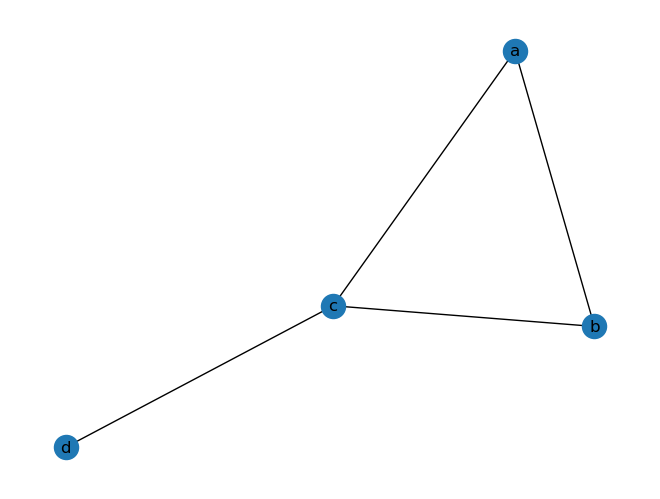

In [3]:
# Initialize an empty (undirected) graph
G = nx.Graph()

# Give each a node a 'name', which is a letter in this case.
G.add_node("a")

# The add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ["b", "c", "d"]
G.add_nodes_from(nodes_to_add)

# Add edge from 'a' to 'b'
# Since this graph is undirected, the order doesn't matter here
G.add_edge("a", "b")

# Just like add_nodes_from, we can add edges from a sequence
# Edges should be specified as 2-tuples
edges_to_add = [("a", "c"), ("b", "c"), ("c", "d")]
G.add_edges_from(edges_to_add)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [4]:
# Print basic information about the graph
print(G)

# List all nodes
print("Nodes:", G.nodes())

# List all edges
print("Edges:", G.edges())

Graph with 4 nodes and 4 edges
Nodes: ['a', 'b', 'c', 'd']
Edges: [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]


We can see the properties of a specific node.


In [5]:
# Degree of a node
print("Degree of 'a':", G.degree("a"))

Degree of 'a': 2


A graph is **connected** when we can reach any node from any other node by following the edges.


In [6]:
# Connectivity
print("Is connected:", nx.is_connected(G))

Is connected: True


Is connected: False


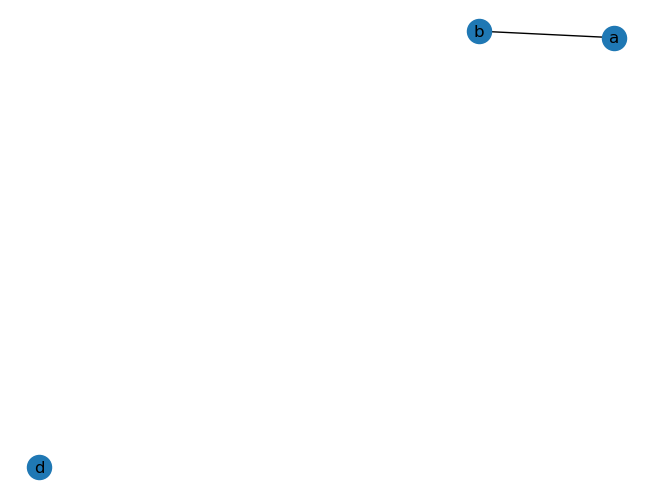

In [7]:
# Remove a node
if "c" in G.nodes():
    G.remove_node("c")

# Is connected now?
print("Is connected:", nx.is_connected(G))

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

---


## Directed Graphs


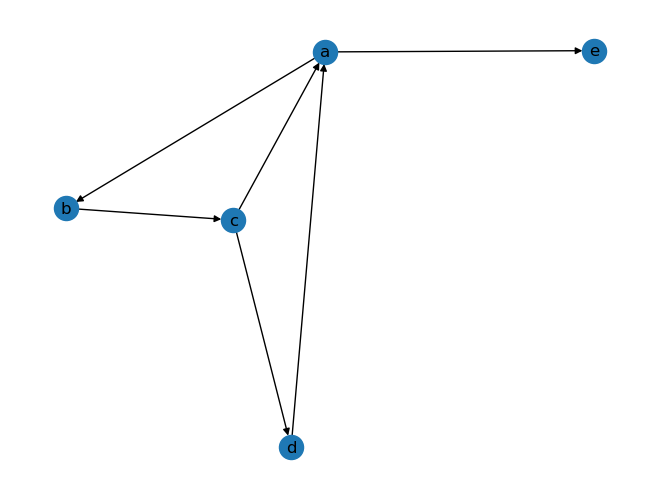

In [8]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges. The order of the tuple matters here because this is a directed graph
# If a node is not already in the graph, it will be added automatically
D.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
nx.draw(D, with_labels=True)
plt.show()

We can see the same properties of the undirected graph in the directed graph. However, the directed graph has a direction in the edges.


In [9]:
# Print basic information about the graph
print(D)

# List all nodes
print("Nodes:", D.nodes())

# List all edges
print("Edges:", D.edges())

DiGraph with 5 nodes and 6 edges
Nodes: ['a', 'b', 'c', 'd', 'e']
Edges: [('a', 'b'), ('a', 'e'), ('b', 'c'), ('c', 'd'), ('c', 'a'), ('d', 'a')]


Same with a node. It has an in-degree and an out-degree.


In [10]:
print("In-degree of 'a':", D.in_degree("a"))
print("Out-degree of 'a':", D.out_degree("a"))

In-degree of 'a': 2
Out-degree of 'a': 2


The **connectivity** of a directed graph is defined by the **strongly connected components**. A directed graph is **strongly connected** if there is a directed path from any node to any other node. Conversely, a directed graph is **weakly connected** if there is an undirected path from any node to any other node.


In [11]:
# Connectivity
print("Is strongly connected:", nx.is_strongly_connected(D))
print("Is weakly connected:", nx.is_weakly_connected(D))

Is strongly connected: False
Is weakly connected: True


**Exercise.** Make a copy of graph `D` and name it `D_strong`. Turn it into a strongly connected graph.


**Exercise.** Make a copy of graph `D` and name it `D_uncon`. Turn it into a unconnected graph.


---


## Paths in a Graph


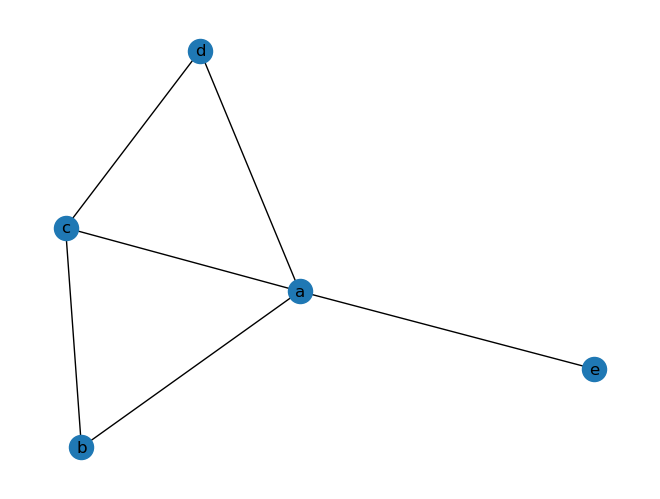

In [12]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

A **path** in a network is a sequence of edges connecting two nodes.


In [13]:
print(nx.has_path(G, "c", "e"))
print(nx.shortest_path(G, "c", "e"))
# The second command will raise if the graph is not connected

True
['c', 'a', 'e']


There can be more than one path between two nodes.


In [14]:
list(nx.all_simple_paths(G, "c", "e"))
# This command will raise if the graph is not connected

[['c', 'b', 'a', 'e'], ['c', 'd', 'a', 'e'], ['c', 'a', 'e']]

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:


In [15]:
list(nx.connected_components(G))

[{'a', 'b', 'c', 'd', 'e'}]

**Exercise.** How many connected components are there in the graph `G` below?


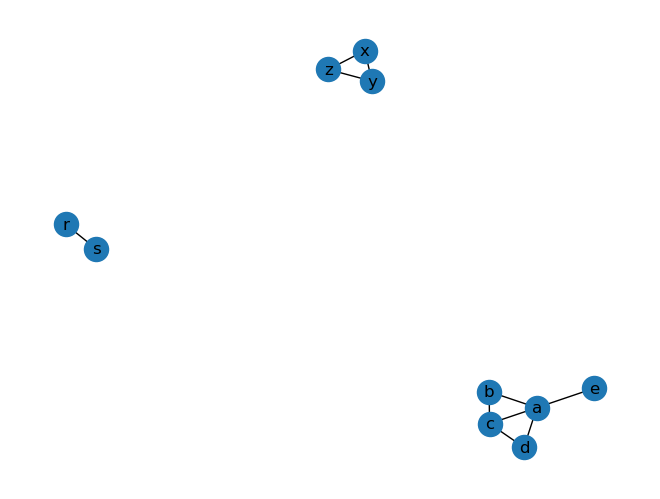

In [16]:
list_edges = [("x", "y"), ("y", "z"), ("z", "x"), ("r", "s")]

G.add_edges_from(list_edges)

nx.draw(G, with_labels=True)
plt.show()

### Paths in a Directed Graph


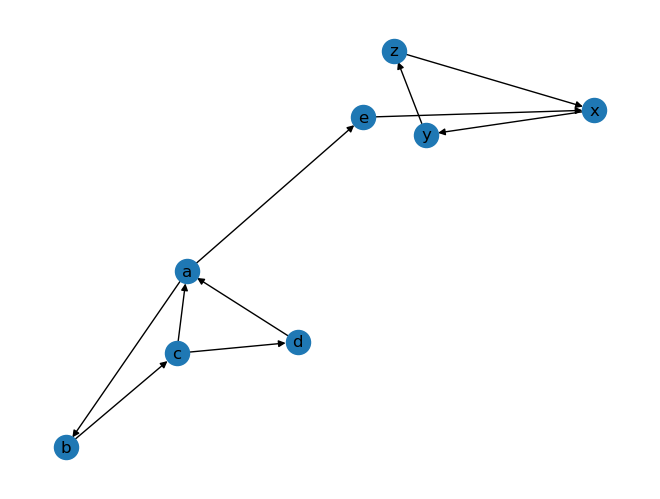

In [17]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges
D.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
        ("e", "x"),
    ]
)

# Draw the graph
nx.draw(D, with_labels=True)
plt.show()

In [18]:
# Can we reach 'c' from 'z'?
nx.has_path(D, "c", "z")

True

In [19]:
# Can we reach 'z' from 'c'?
nx.has_path(D, "z", "c")

False

**Exercise.** Create a path from "z" to "c" in the directed graph `D`, so that the shortest path has a length of 4.


---


## Loading a Graph from a File


This repository contains several example network datasets. Among these is a network of US air travel routes:


In [20]:
G = nx.read_graphml("../../data/openflights/openflights_usa.graphml.gz")

print(G)
print("Nodes:", G.nodes())

Graph with 546 nodes and 2781 edges
Nodes: ['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges

```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```

where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports, in the form of a dictionary:


In [21]:
G.nodes["IND"]

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

**Exercise.** Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.


**Exercise.** If I wanted to fly from Indianapolis (IND) to Fairbanks, Alaska (FAI) what would be an itinerary with the fewest number of flights?


**Exercise.** Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?


---


## Clustering Coefficient


The **clustering coefficient** of a node is a measure of how well its neighbors are connected to each other. It is defined as:

$$
C_i = \frac{2e_i}{k_i(k_i - 1)}
$$

where $e_i$ is the number of edges between the neighbors of node $i$, and $k_i$ is the number of neighbors of node $i$.


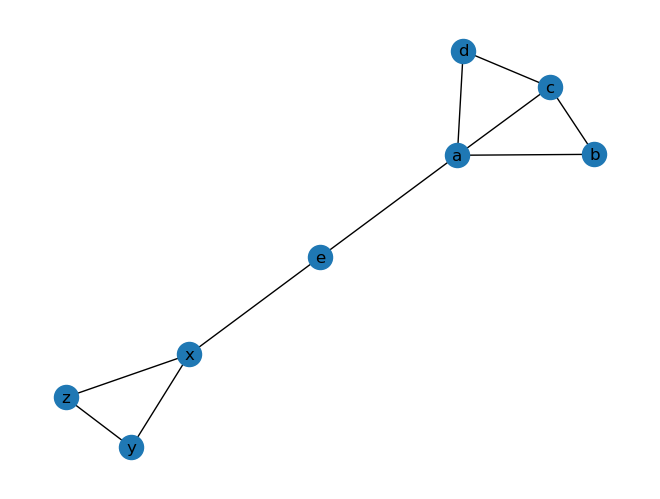

In [23]:
# Initialize an empty graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
        ("e", "x"),
    ]
)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [25]:
# Clustering coefficient of each node
for node in G.nodes():
    print(f"Clustering coefficient of '{node}': {nx.clustering(G, node)}")

Clustering coefficient of 'a': 0.3333333333333333
Clustering coefficient of 'b': 1.0
Clustering coefficient of 'c': 0.6666666666666666
Clustering coefficient of 'd': 1.0
Clustering coefficient of 'e': 0
Clustering coefficient of 'x': 0.3333333333333333
Clustering coefficient of 'y': 1.0
Clustering coefficient of 'z': 1.0


The clustering coefficient of a graph is the average of the clustering coefficients of all its nodes.


In [26]:
# Clustering coefficient of the whole graph
print(f"Clustering coefficient of the graph: {nx.average_clustering(G)}")

Clustering coefficient of the graph: 0.6666666666666667


**Relevance.** The clustering coefficient is a measure of the extent to which a network is composed of tightly knit groups. It is a measure of the extent to which nodes tend to cluster together.


---


## Centrality


The **degree centrality** of a node is the fraction of nodes it is connected to. It is defined as:

$$
C_D(i) = \frac{k_i}{N - 1}
$$

where $k_i$ is the degree of node $i$, and $N$ is the total number of nodes in the graph.


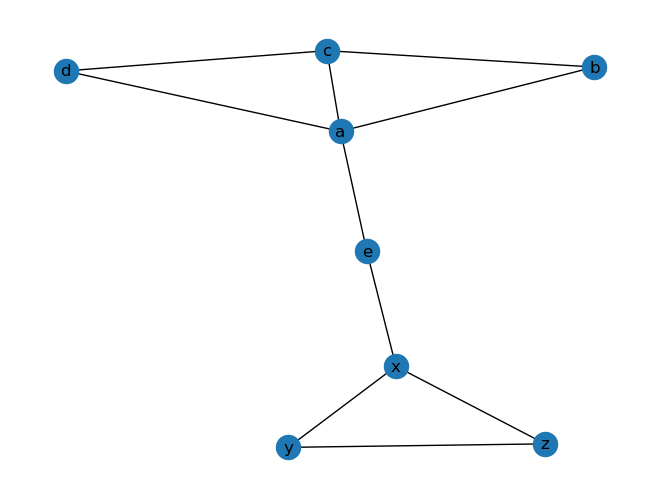

{'a': 0.5714285714285714,
 'b': 0.2857142857142857,
 'c': 0.42857142857142855,
 'd': 0.2857142857142857,
 'e': 0.2857142857142857,
 'x': 0.42857142857142855,
 'y': 0.2857142857142857,
 'z': 0.2857142857142857}

In [35]:
nx.draw(G, with_labels=True)
plt.show()

d_centrality = nx.centrality.degree_centrality(G)
d_centrality

The **betweenness centrality** of a node is the fraction of shortest paths between all pairs of nodes that pass through that node. It is defined as:

$$
C_B(i) = \sum_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}
$$

where $\sigma_{st}$ is the total number of shortest paths between nodes $s$ and $t$, and $\sigma_{st}(i)$ is the number of those paths that pass through node $i$.


In [37]:
d_centrality = nx.centrality.betweenness_centrality(G)
d_centrality

{'a': 0.5952380952380952,
 'b': 0.0,
 'c': 0.023809523809523808,
 'd': 0.0,
 'e': 0.5714285714285714,
 'x': 0.47619047619047616,
 'y': 0.0,
 'z': 0.0}

It is informative to plot the distribution of centrality values across all nodes in the graph.


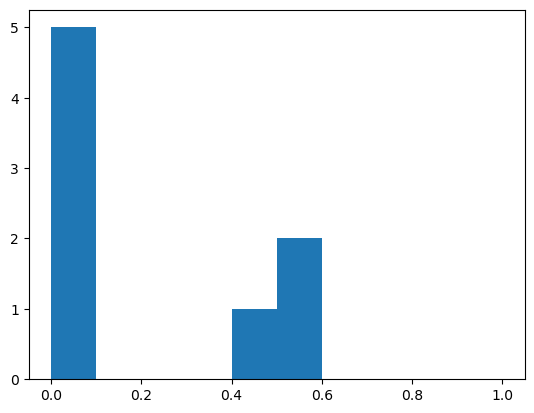

In [39]:
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.show()

**Relevance.** Centrality measures are used to identify the most important nodes in a network. They are used to identify the most influential nodes in a network, the nodes that are most likely to spread information or disease, etc.


**Exercise.** Look at the Enron executive email graph. Who are the most central nodes in the network according to degree centrality? Who are the most central nodes according to betweenness centrality? Plot the distribution of degree and betweenness centralities across all nodes.


Graph with 143 nodes and 623 edges


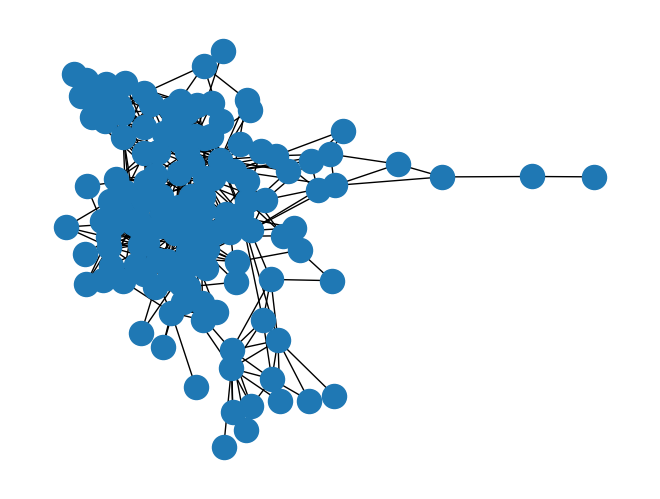

In [40]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

# Basic information about the graph
print(G)

# Visualize the graph
nx.draw(G)
plt.show()

---


## Robustness


To test the robustness of a network, we can remove nodes or edges and see how the network changes. We can measure the size of the largest connected component as we remove nodes or edges.


In [48]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

### Random Failure


To simulate random failure, we remove nodes or edges at random. Every time we remove a node or edge, we measure the size of the largest connected component.


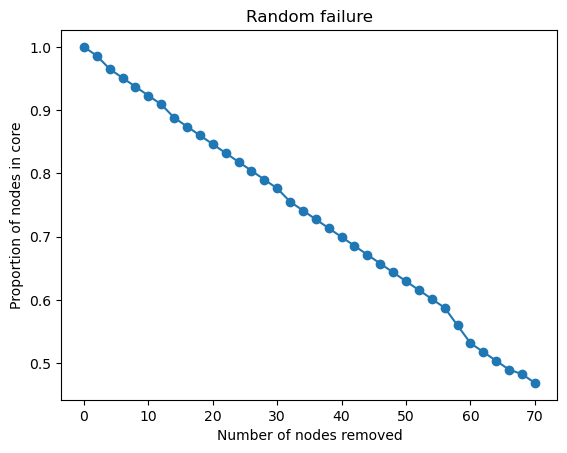

In [ ]:
# Store the original number of nodes
num_nodes = G.number_of_nodes()
# Minimum number of nodes to keep
min_num_nodes = num_nodes // 2
# Nodes to remove each time
num_nodes_to_remove = 2

# Make a copy of the graph
C: nx.Graph = G.copy()

# Initialize a list to store the relative size of the core
random_attack_core_proportions = []
random_attack_nodes_removed = []

# Remove nodes one by one
while C.number_of_nodes() > min_num_nodes:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / num_nodes
    random_attack_core_proportions.append(core_proportion)
    random_attack_nodes_removed.append(num_nodes - C.number_of_nodes())
    # Remove one random node
    nodes_to_remove = random.sample(list(C.nodes), num_nodes_to_remove)
    C.remove_nodes_from(nodes_to_remove)

plt.title("Random failure")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(random_attack_nodes_removed, random_attack_core_proportions, marker="o")
plt.show()
plt.close()

### Targeted Attack


During a targeted attack, we remove nodes or edges in order of decreasing centrality. Every time we remove a node or edge, we measure the size of the largest connected component.


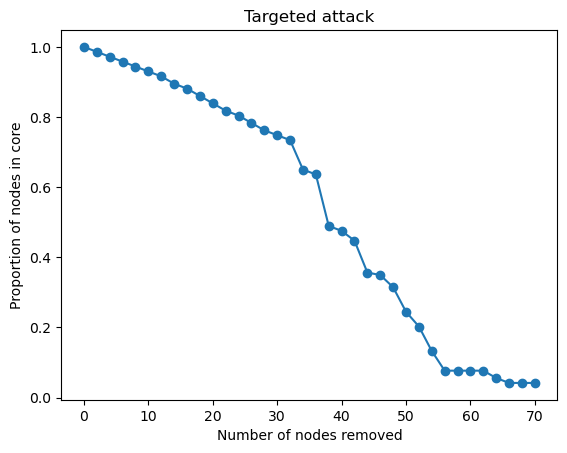

In [ ]:
# Store the original number of nodes
num_nodes = G.number_of_nodes()
# Minimum number of nodes to keep
min_num_nodes = num_nodes // 2
# Nodes to remove each time
num_nodes_to_remove = 2

# Make a copy of the graph
C: nx.Graph = G.copy()

# Initialize a list to store the relative size of the core
targeted_attack_core_proportions = []
targeted_attack_nodes_removed = []

# Remove nodes one by one
while C.number_of_nodes() > min_num_nodes:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / num_nodes
    targeted_attack_core_proportions.append(core_proportion)
    targeted_attack_nodes_removed.append(num_nodes - C.number_of_nodes())
    # Remove nodes with the highest degree
    # First, we sort the nodes by their degree
    nodes_to_remove = sorted(C.degree, key=lambda x: x[1], reverse=True)
    # Then, we remove the first N nodes
    nodes_to_remove = nodes_to_remove[:num_nodes_to_remove]
    C.remove_nodes_from([node for node, _ in nodes_to_remove])

plt.title("Targeted attack")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(targeted_attack_nodes_removed, targeted_attack_core_proportions, marker="o")
plt.show()
plt.close()

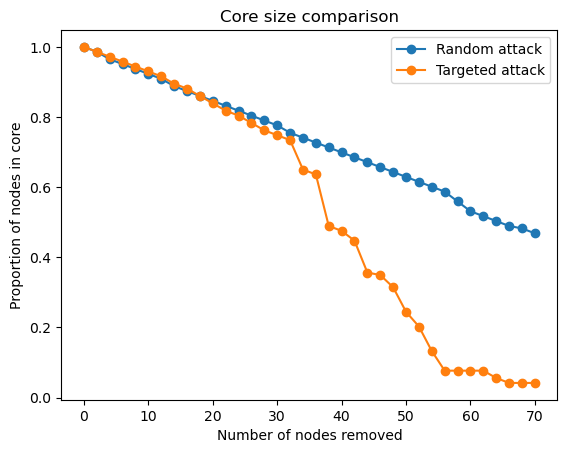

In [ ]:
# Compare the two strategies
plt.title("Core size comparison")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(
    random_attack_nodes_removed,
    random_attack_core_proportions,
    label="Random attack",
    marker="o",
)
plt.plot(
    targeted_attack_nodes_removed,
    targeted_attack_core_proportions,
    label="Targeted attack",
    marker="o",
)
plt.legend()
plt.show()
plt.close()

---
